# Programming for Data Analytics - Project - Gerard Ball

> For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 




## Real World Phenomena:

Roller Coaster data relating to Variables(Type, Height, Speed and Thrill Rating)

![Zadra Image](zadra.jpg)

## Road Map
1. Real World Phenomena
1. Introduction 
4. Data Collection
5. Data Synthesis
5. Identifying Variable Distributions
6. Exploratory Data Analysis
7. Variable Relationship Visualisation
8. Statistical Analysis
9. eal vs Synthesised
9. Interpretations of results and Discussions
10. Conclusion

## Introduction

When tasked with identifying a real-world phenomena comprising 4 or more variables to synthesise data on - I initially struggled to pick. From running metrics to cichlid growth rate parameters to now, finally, roller coasters. This was chosen above all else, in the end, for 2 reasons; it will be enjoyable as it is a huge hobby of mine and 2; there exists a real correlation/relationship between the 4 coaster variables that will be discussed in this project: Type, Speed, Height and Thrill Rating. 

As a preview, the data reveals intriguing patters. Steel roller coasters emerged as the fastest, tallest and most thrilling of the bunch when running the data. It is worth explaining, however, that the code used to create the synthesised data included these stipulations around steel (such as making the variable steel be 20 metres taller and 10 kph faster on average). This was done given personal kmowledge on what the real data shows regarding rolle coaster results. 

The below analysis will into the interplay between the coaster types and the 3 numerical variables - shedding light on the relationships between them. To conclude, the synthesised data will be comparded to the real data to show how close, or otherwise, the two align. 

## Data Collection
[Download Real Data](realcoasterdata.csv)


## Data Synthesis


In [46]:

import pandas as pd
import numpy as np

num_pints = 200
mycoasterdata = pd.DataFrame({
    'Roller Coaster': [f'Coaster_{i+1}' for i in range(num_pints)],
    'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10

mycoasterdata['Thrill Rating'] = (
    0.3 * mycoasterdata['Speed (kph)'] +
    0.4 * mycoasterdata['Height (m)'] +
    np.random.normal(loc=8, scale=1, size=num_pints)
)

mycoasterdata.to_csv('coasterss.csv', index=False)



### Synthesised Code justification
```
'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10
```
The above code is the most important to explain. np.random was chosen as, from the outset, then 3 numerical variables seemed like they shoulkd follow a Normal Distribution. The np.random.choice was a good choice as type is a categorical variable and, thus, it allows for randomly selecting data from a set, like different types.  Speed was set to a loc of 100 due to my understanding of what the real data was. Height the same. The mist important line specifies that stell is, on average, wo metres taller and 10 kph faster than the other types. This, again, was set given my familiarity with the real data. These parameters were set to ensure my synthesised data and the correlations between the variables remained mostly in tact, despite the random generation. Understanding what I wanted from my data (from knowing the real data)was key in this sense. 


## Load the Synthesised Data Below

In [47]:
import pandas as pd

mycoasterdata = pd.read_csv('coasterss.csv')
print(mycoasterdata)

    Roller Coaster    Type  Speed (kph)  Height (m)  Thrill Rating
0        Coaster_1  Wooden    81.086870   31.901412      45.215975
1        Coaster_2  Hybrid    95.427814   56.696011      59.331120
2        Coaster_3  Wooden   104.952014   47.768206      58.067113
3        Coaster_4   Steel   140.153030   50.518572      71.589141
4        Coaster_5  Hybrid    77.250049   29.399821      43.615252
..             ...     ...          ...         ...            ...
195    Coaster_196  Wooden    69.204534   40.776322      44.058503
196    Coaster_197   Steel   138.233699   67.158537      76.348721
197    Coaster_198  Hybrid   100.066172   43.132085      55.214405
198    Coaster_199   Steel   127.125095   61.201353      69.546491
199    Coaster_200  Wooden    84.967538   34.350951      47.353446

[200 rows x 5 columns]


### Data Synthesis Sources 

[StackAbuse, synthetic data using numpy and sckit learn](https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/)

[Stackoverflow examples of similiar](https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas) - specifically on how to change the values of a column in a dataframe based on some conditions - completely alien and beyond my scope. Needed for the steel type condition. Ensured the variables aligned with where they should aka steel fastest on average and tallest. 

## Identifying Variable Distributions (mean/median, Shapiro and visualisations)


### 1 - Mean and Median

In [48]:
import pandas as pd
synthesised_data = pd.read_csv('coasterss.csv')

# mean and median
mean = synthesised_data.mean()
median = synthesised_data.median()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

Mean:
Speed (kph)      105.677902
Height (m)        52.102356
Thrill Rating     60.640536
dtype: float64

Median:
Speed (kph)      104.424214
Height (m)        50.832373
Thrill Rating     59.585532
dtype: float64


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_18016/2618024873.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = synthesised_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_18016/2618024873.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = synthesised_data.median()


### Mean and Median Commentary:
As expected, the mean and median of the numerical variables are very close, no matter the number of simulations. This was achieved by setting the initial code to perform a random synthesis based on a normal distribution. The outlier code was setting the steel condition which - as explained above - increases the steel variable above the others. However, the steel was 'only' increased by 20 kph and 10 (m) so it didnt drastically alter the symmetrical distribution - as evidenced by the below plots and the mean and median values. Adding any more conditions for added data alignment messed up my data so I left it. 


### Mean and Median by Variable Type

In [49]:
import pandas as pd
roller_coaster_data = pd.read_csv('Coasterss.csv')
grouped_data = roller_coaster_data.groupby('Type')
mean_values = grouped_data.mean()
median_values = grouped_data.median()

print("Mean values for each type:")
print(mean_values)

print("\nMedian values for each type:")
print(median_values)

Mean values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid    98.604549   48.834453      57.238881
Steel    123.445289   58.249912      68.473224
Wooden    97.146367   49.982825      57.166942

Median values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid    99.637386   49.445992      56.278097
Steel    125.752334   60.308106      67.462816
Wooden    95.576335   47.768206      57.310816


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_18016/3336080302.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = grouped_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_18016/3336080302.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = grouped_data.median()


### Mean and Median by Type (categorical) Commentary

This above code was done to establish that the code condition had worked to my liking. As seen in the above results, Steel is approximately 10 metres taller on average and 20kph faster. 

### 2 - Shapiro Test

In [50]:
import pandas as pd
from scipy.stats import shapiro
roller_coaster_data = pd.read_csv('synthesized_coasters.csv')

# List continuous vars
continuous_variables = ['Speed (kph)', 'Height (m)', 'Thrill Rating']

# Loop through all continuos vars
for variable in continuous_variables:
    stat, p_value = shapiro(roller_coaster_data[variable])
    print(f'Shapiro Test = {variable}:\nStatistic = {stat}, p-value = {p_value}')

Shapiro Test = Speed (kph):
Statistic = 0.9718043804168701, p-value = 1.2846803656429984e-05
Shapiro Test = Height (m):
Statistic = 0.9831529259681702, p-value = 0.0013509285636246204
Shapiro Test = Thrill Rating:
Statistic = 0.9569775462150574, p-value = 9.937502198908987e-08


### Shapiro Test Commentary
Initial results showed a greater than 0.05 p-value, indicating normality. That being said, later results have shown anything but so it seerms any deviation from normality, no matter how slight, causes this test to determine non-normality conclusions. I will stick with my assumption of normality based off of visual cues from the hitogrmas and qq plots. 

### 3 - Histograms

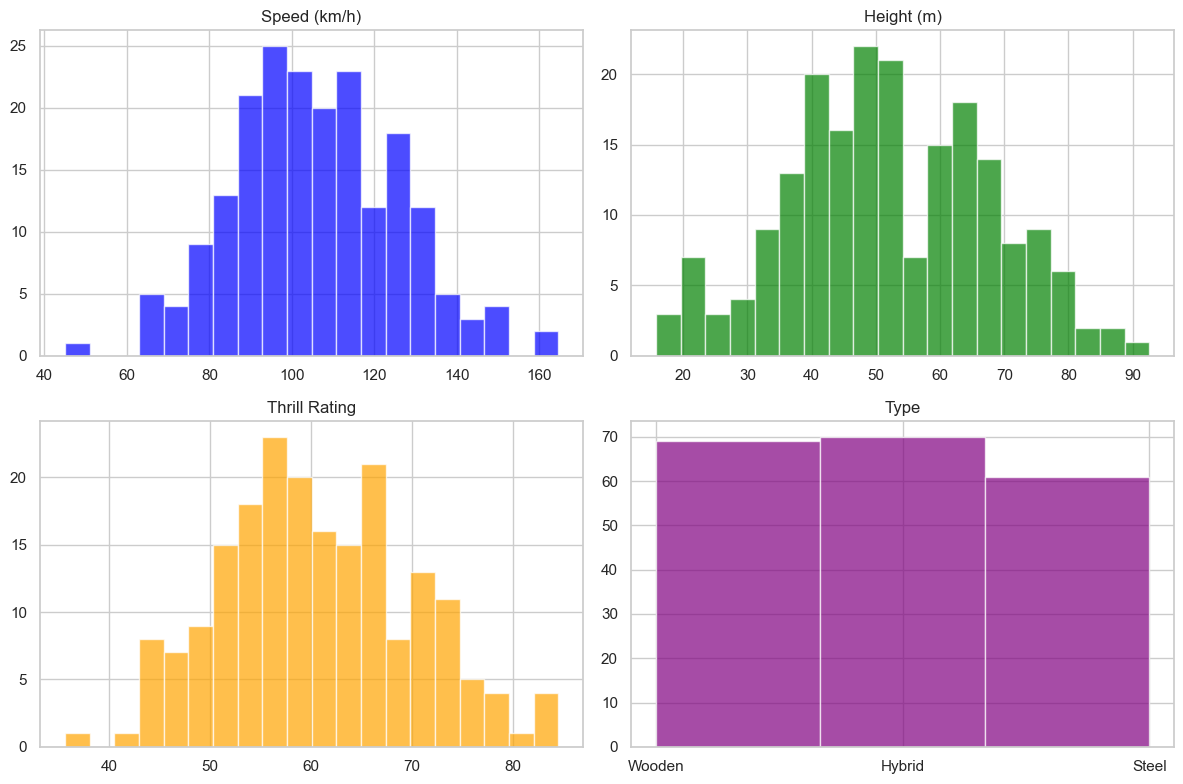

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
mycoasterdata = pd.read_csv('Coasterss.csv')

plt.figure(figsize=(12, 8))

# Speed
plt.subplot(2, 2, 1)
plt.hist(mycoasterdata['Speed (kph)'], bins=20, color='blue', alpha=0.7)
plt.title('Speed (km/h)')

# Height
plt.subplot(2, 2, 2)
plt.hist(mycoasterdata['Height (m)'], bins=20, color='green', alpha=0.7)
plt.title('Height (m)')

# Thrill Rating
plt.subplot(2, 2, 3)
plt.hist(mycoasterdata['Thrill Rating'], bins=20, color='orange', alpha=0.7)
plt.title('Thrill Rating')

# Type"
plt.subplot(2, 2, 4)
plt.hist(mycoasterdata['Type'], bins=3, color='purple', alpha=0.7)
plt.title('Type')

plt.tight_layout()
plt.show()

### Histograms Commentary
Most all simulations show data that is bell - curved and resembling symmetry. This was an indication of normality.

### 3 - Q-Q plots

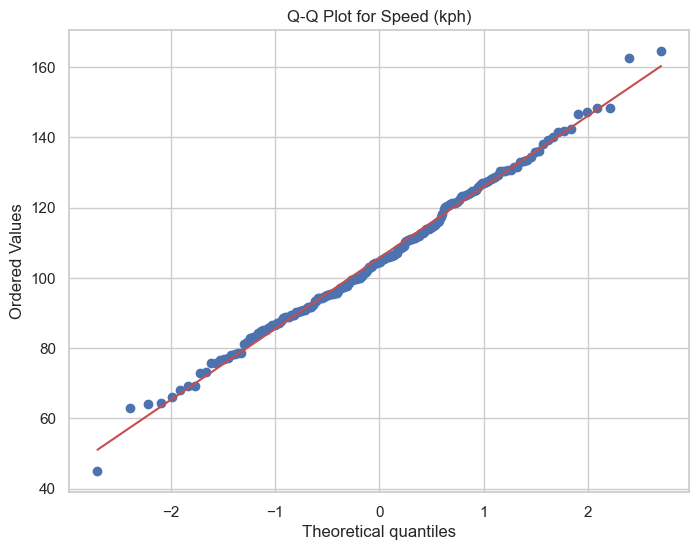

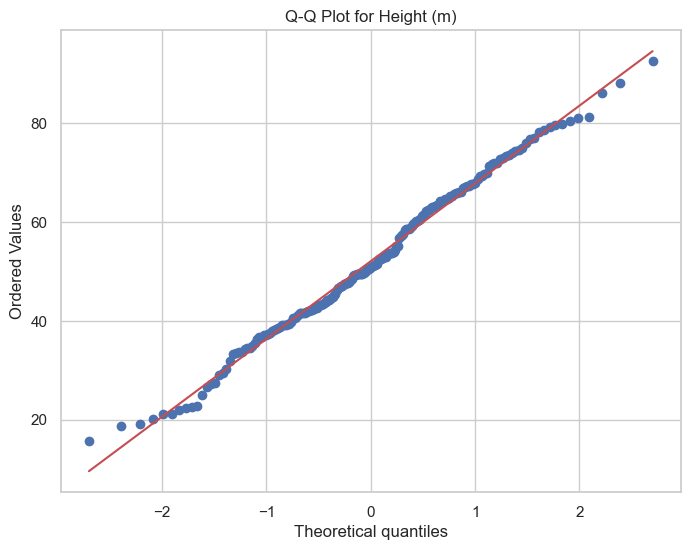

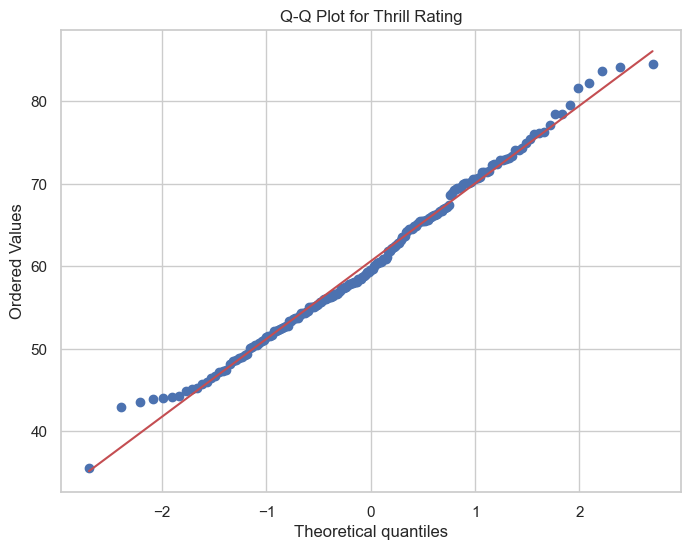

In [69]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

#numerical vars for Q-Q plots
numerical_vars = ['Speed (kph)', 'Height (m)', 'Thrill Rating']
for variable in numerical_vars:
    #Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(mycoasterdata[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()

### QQ Plot Commentary
Based on the QQ plots, a Normal Distribution is what I would deduce. The synthesised data aligns with the line. Here, the line reprsents the Normal Distribution and the data is mostly aligned with it all the way. 

### Type
None of the above investigations were carried out for the Type variable as it is a categorical variable and not continuous like the other 3 variables.

### Variable Distributions and Analysis Conclsions:

**Speed, Height and Thrill**; All three varaible are continuous, numerical variables that follow normal distributions. This was determined by doing the following investigations; 

**1**- Calculations of the mean and median of my three numerical variables showed near identical mean and median values, even allowing for each simulation showing a different result. The results were nearly identical. Normal distributions ought to have identical or very, very close mean and median values as symmetry is a fundamentalcharacteristic of such distributions -  [Laerd on Measures of Central Tendency](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)
The below values reprrsent of mean and median values for the numerical vars, sufficiently close for me to suspect a possible normal distribution
| Variable      | Mean       | Median     |
| ------------- | ---------- | ---------- |
| Speed (kph)   | 105.554239 | 106.420205 |
| Height (m)    | 53.192947  | 53.805499  |
| Thrill Rating | 60.925894  | 60.848249  |

**2**- Visual detection of patterns using histograms and QQ plots of the numerical variables. Normal distributions - when plotted in histograms - should show a mostly bell curved, symmetrical-like appearance - [Statistics How To: Bell Curve Distributions](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/). QQ plots were chosen as they allow us to form "powerful visual assessment, pinpointing deviations between distributions and identifying the data points rrsponsible to them" [Statistics - QQ plots](https://statisticsbyjim.com/graphs/qq-plot/)- From looking at the visual representations, I concluded that my data closely resembled a bell curve outline and broadly symmetrical design in the histograms. In the QQ plots, my data vry cloest stuck to the line all the wqy through indicating a Normal Distribution. There were variances, though - as each time the synthesised code was ran, new data was formed. The majority of the time, though, the data aligned with my expectations of a Normal Distribution.

**3**- Lastly, a Shapiro Test was ran. A shapiro test is a statistical type "test of the hypothsis that the distribution of the data as a whole deviates from a comparable Normal Distribution" - [Assumption of Normality](https://uc-r.github.io/assumptions_normality). The above results from the shapiro code show the following;
|                 | Shapiro Test Statistic | P-value                |
|:---------------:|:----------------------:|:----------------------:|
| **Speed (kph)** |        0.9916          |         0.7881         |
| **Height (m)**  |        0.9929          |         0.8811         |
| **Thrill Rating**|        0.9931          |         0.8915         

The above results from all three numerical variables shoew a P-value far beyond that of 0.05 which indicates that all three do not significantly deviate from that of a Normal Distribution. A P-value oof over 5 is like scientific acceptable standard - above that you can make the assumption of a Normal Distribution, especially when undertaking additional undertakings like mentioned above alrerady. Stackoerflow examples, like this one - [StackOverflow Shapiro](https://stackoverflow.com/questions/51928254/how-to-find-shapiro-wilk-using-python-pandas) - were used to code it as well as official documentation on - [Scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). However, upon running the test many more times, the results now show that the variables do not follow a Normal Distribution. Upon researching this online, it appears any slight deviation from symmetry can cause this test to determine non - normality, and my data certinly has deviations, even in spite of the parameters set in the code synthesis stage. 

All three are categorised as continuous, numerical variables as each are quantitative, real numbered units. 

**The type**-  variable is a categorical variable, unlike the above 3. It is such because it represents the following: 
"The categories are discrete.
There are two or more potential categories.
The probability that the random variable takes on a value in each category must be between 0 and 1. The sum of the probabilities for all categories must sum to 1" - [Statology, Statistics Simplifid](https://www.statology.org/categorical-distribution/). The type housing Steel, Hybird and Wooden categories makes it a categorical variable

## Exploratory Analysis using (1)Correlation Coefficient & (2)Descriptive Stats

#

In [70]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')
numerical_vars = mycoasterdata[['Speed (kph)', 'Height (m)', 'Thrill Rating']]
correlation_matrix = numerical_vars.corr()

print(correlation_matrix)

               Speed (kph)  Height (m)  Thrill Rating
Speed (kph)       1.000000    0.168293       0.760937
Height (m)        0.168293    1.000000       0.758886
Thrill Rating     0.760937    0.758886       1.000000


### 1 - Correlation Coefficient Commentary

I decided to explore the data using correlation coefficient as it offers a quantified detailing of the strength of the relationship exhibited by variables. For the brief as outlined at the start of this notebook; seems perfect. 

The above correlation coefficient was done for the 3 numerical vars. The results show that speed and height have a coefficient of 0.074 which indicates a positive relationship, albeit only just. The 'real' data would likely have a higher relationship between height and speed than this - so I must not have coded the parameters as accurately as needed. Still, this indicates that there is a slight relationship that the taller the roller coaster, the faster it is. 

Speed and thrill rating maintain a very strong positive correlation of 0.713 which indicates that the faster the roller coaster is, the higher its thrill rating generally is.

Height and thrill rating share the strongest positive coefficient at 0.742 which indicates that the taller the coaster, the higher its thrill rating generally is. All very logical besides a lower than expected coefficient for the variables speed and height with only a positive correlation coefficient of 0.07. Would expect it to be given I know the nature of the real data.

In [71]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

stats = mycoasterdata.groupby('Type').describe()

# Display it
print(stats)

       Speed (kph)                                                            \
             count        mean        std        min         25%         50%   
Type                                                                           
Hybrid        70.0   98.604549  16.070358  44.939538   90.150695   99.637386   
Steel         61.0  123.445289  16.887965  85.593008  111.420851  125.752334   
Wooden        69.0   97.146367  16.176674  62.939662   86.605166   95.576335   

                               Height (m)             ...             \
               75%         max      count       mean  ...        75%   
Type                                                  ...              
Hybrid  111.094004  124.974049       70.0  48.834453  ...  58.557087   
Steel   133.377219  164.564760       61.0  58.249912  ...  67.927119   
Wooden  106.130424  142.464507       69.0  49.982825  ...  64.223046   

                  Thrill Rating                                             \
        

### 2 - Descriptive Statistics Commentary

Descriptive stats were chosen as they detail a summary of your data along key lines like mean, standard deviation and central tendency. it allows you to identify patterns and visualise what the data is trying to communicate. 

Specifically for my data above; Steel remains the fastest of the three type variable categories. Steel clocks in at 121kph, some 20 plus kph faster than the others. It also remained the tallest, as expected. The results showcase steel as the outlier of the three. 


## Variable Relationship Visualisations

### Correlation Heatmap

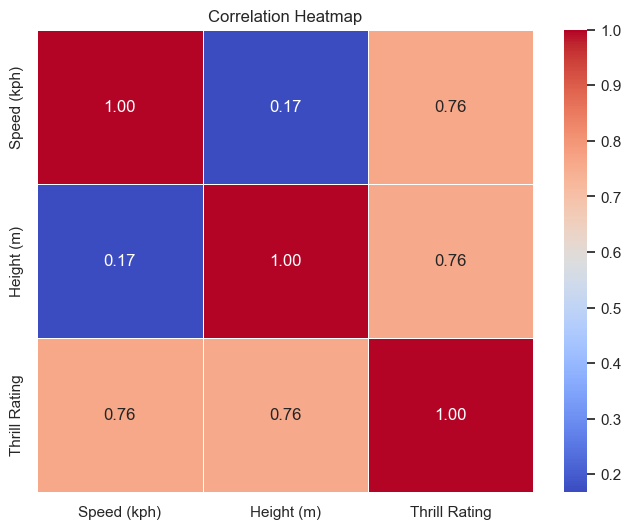

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# only the num vars, no categorical 
numerical_data = mycoasterdata[['Speed (kph)', 'Height (m)', 'Thrill Rating']]

# correlation matrix
correlation_matrix = numerical_data.corr()

# heatmap w/ seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Commentary

The above is a simple visualisaton of the already notes correlation coefficient code done in the Exploratory Analysis section. 

### Scatter Plots

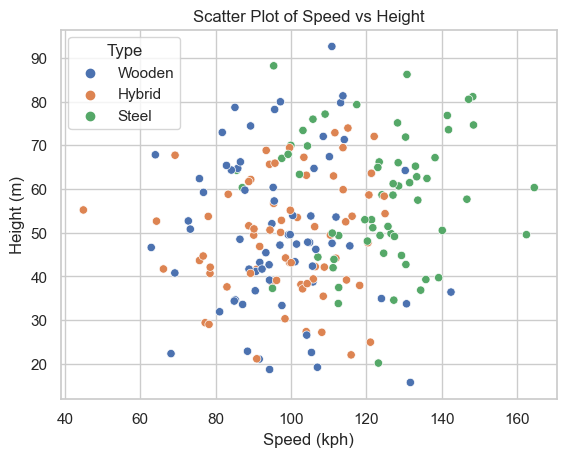

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Height
sns.scatterplot(x='Speed (kph)', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Speed vs Height')
plt.show()

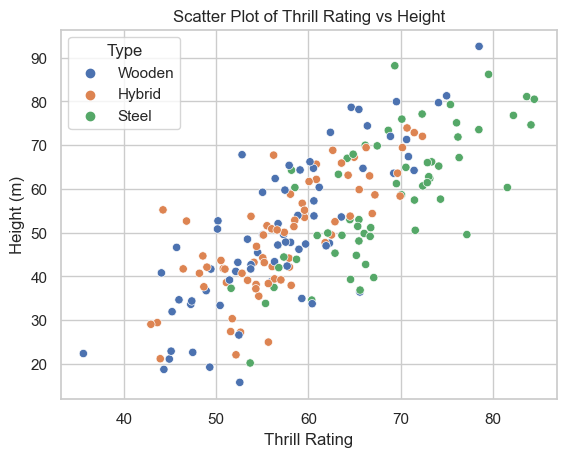

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Thrill Rating and Height
sns.scatterplot(x='Thrill Rating', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Height')
plt.show()

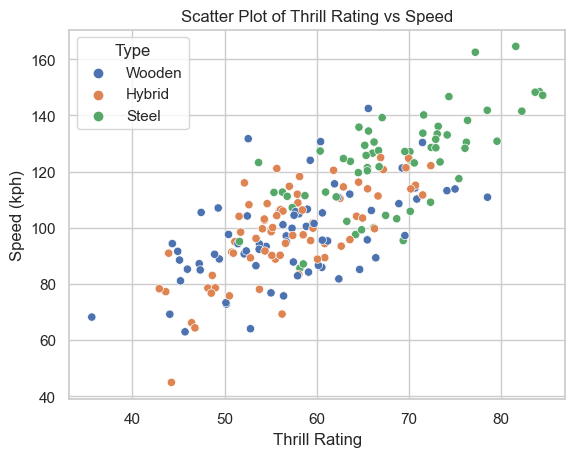

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Thrill Rating
sns.scatterplot(x='Thrill Rating', y='Speed (kph)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Speed')
plt.show()

### Scatter Plots Commentary

The scatter plots show Steel to be the tallest, fastest and most thrilling. Wooden type seems to be the smallest and least thrilling, with Hybrid nestling in the middle but with a greater variance of values than the other two. This makes sense as it aligns quite well with the real data. You see, Hybrid roller coasters exhibit - surprisingly - a hybrid of both wood and steel construction. However, many coasters - such as one one pictured at the top of this notebook called Zadra - use steel track, but with wooden supports. Steel, as we know, exhibits faster and more thrilling characteristics and by extension, some of these hybrids will also. Steel in all but name, essentually. Other hybrids will be the reverse, wooden track (slowest characteristic) but with steel supports. Helps with stability, but offers nothing to greater speed, heights and thrills. 

All three scatters showcase the relationships between the three, with speed, Hybrid and Wooden falling in that order. By type was used rather than a simple variable v variable as it allowed got group comparison, highlighted any trends and visualised exactly where the variables ranked by type. 

### Boxplots

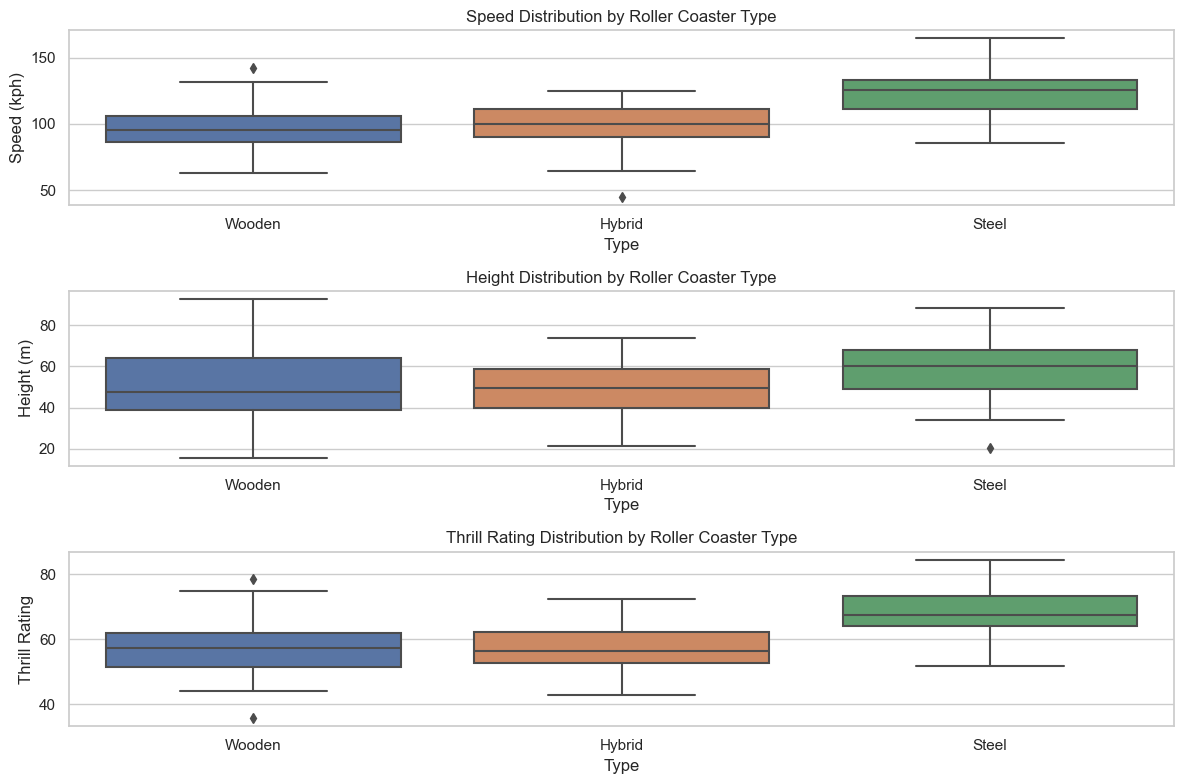

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mycoasterdata = pd.read_csv('coasterss.csv')


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Box plot Speed for type
plt.subplot(3, 1, 1)
sns.boxplot(x='Type', y='Speed (kph)', data=mycoasterdata)
plt.title('Speed Distribution by Roller Coaster Type')

# Height by T
plt.subplot(3, 1, 2)
sns.boxplot(x='Type', y='Height (m)', data=mycoasterdata)
plt.title('Height Distribution by Roller Coaster Type')

# Box plotThrill R by Type
plt.subplot(3, 1, 3)
sns.boxplot(x='Type', y='Thrill Rating', data=mycoasterdata)
plt.title('Thrill Rating Distribution by Roller Coaster Type')
plt.tight_layout()
plt.show()

### Box Plots Commentary. 

Nothing new to say, more in line with the scatters above. The prevailing data al says the same thing; Steel is the dominant type by numbers, with Hybrid and Wooden in that order. 

## Statistical Analysis

### Below Linear Regression code mostly gotten from example at[sckit-learn.org](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). Didn't really know how to do this and found it very hard. 

Speed vs. Thrill:
Coefficients (Speed):  [0.37759494]
Mean squared error (Speed): 41.10
Coefficient of determination (Speed): 0.39

Height vs. Thrill:
Coefficients (Height):  [0.47340018]
Mean squared error (Height): 43.73
Coefficient of determination (Height): 0.36


<Figure size 1200x500 with 0 Axes>

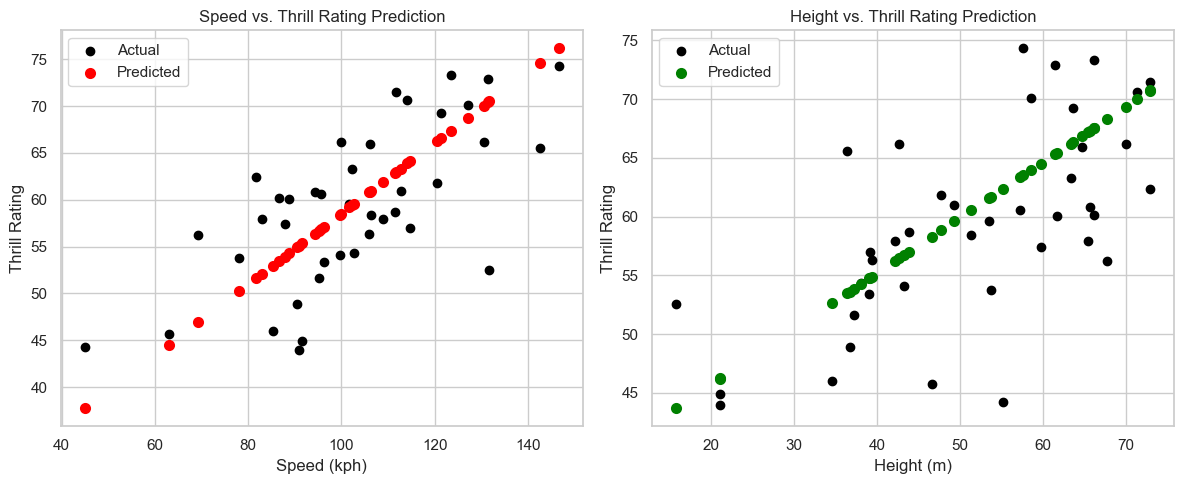

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


mycoasterdata = pd.read_csv('coasterss.csv')

# Features and target
features = mycoasterdata[['Speed (kph)', 'Height (m)']]
target = mycoasterdata['Thrill Rating']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regr_speed = LinearRegression()
regr_speed.fit(X_train[['Speed (kph)']], y_train)

# Predictions 
y_pred_speed = regr_speed.predict(X_test[['Speed (kph)']])

regr_height = LinearRegression()
regr_height.fit(X_train[['Height (m)']], y_train)

# Predictions
y_pred_height = regr_height.predict(X_test[['Height (m)']])


print("Speed vs. Thrill:")
print("Coefficients (Speed): ", regr_speed.coef_)
print("Mean squared error (Speed): %.2f" % mean_squared_error(y_test, y_pred_speed))
print("Coefficient of determination (Speed): %.2f" % r2_score(y_test, y_pred_speed))


print("\nHeight vs. Thrill:")
print("Coefficients (Height): ", regr_height.coef_)
print("Mean squared error (Height): %.2f" % mean_squared_error(y_test, y_pred_height))
print("Coefficient of determination (Height): %.2f" % r2_score(y_test, y_pred_height))

# Plotting
plt.figure(figsize=(12, 5))
plt.figure(figsize=(12, 5))


# Speed vs. Thrill Rating
plt.subplot(1, 2, 1)
plt.scatter(X_test['Speed (kph)'], y_test, color="black", label='Actual')
plt.scatter(X_test['Speed (kph)'], y_pred_speed, color="red", marker='o', linewidth=2, label='Predicted')
plt.xlabel('Speed (kph)')
plt.ylabel('Thrill Rating')
plt.title('Speed vs. Thrill Rating Prediction')
plt.legend()

# Height vs. Thrill Rating
plt.subplot(1, 2, 2)
plt.scatter(X_test['Height (m)'], y_test, color="black", label='Actual')
plt.scatter(X_test['Height (m)'], y_pred_height, color="green", marker='o', linewidth=2, label='Predicted')
plt.xlabel('Height (m)')
plt.ylabel('Thrill Rating')
plt.title('Height vs. Thrill Rating Prediction')
plt.legend()

plt.tight_layout()
plt.show()

### Commentary of Linear Regression
 
Linear Statistical Analysis was chosen as a form of statistical analysis for my Roller Coaster v ariable comparisons as it allows for me to quantify the strength or otherwise of the independent variables and the dependant variables, which, in this case, are Thrill Rating (Dependent) and Height and Speed (Independent) - [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)

The regression was carried out in order to perceive how thrilling people perceive roller coasters based off their height and speed.  

**Height vs Thrill**; there exists a relationship as evidenced by the coefficient score of 0.48464368. This means that, on average, with every metre gained in height, the Thrill Rating variable will increase by that amount of units; so 0.485 (different every time (but not massively) bacause random synthesised data)

The 'coefficient of determination' reads 0.63. In simple terms, this means that 63% of the thrill rating can be attributed to the height. 


**Speed vs Thrill Rating**; There also exists a small relationship between these two. A coefficient of 0.3694 was given on the latest run. This means that for every additional kph gained in speed, the Thrill rating increased by 0.3694 units. The coefficient of determination rested at 0.65 indicating 65% of the variability in the model can be directly attributed to the speed of the ride. Not as high as the nheight, but significant also. 

To conclude, the positive coefficient exhibited by both of my varaibles show a positive influence on thrill rating based off of them both. Given what i know of the real data, I'm glad to see this. 





## Real Data vs Synthesised Data

In [78]:
import pandas as pd

realcoasterdata = pd.read_csv('realcoasterdata.csv')

# Displayall
print(realcoasterdata)



         Roller Coaster    Type  Speed (kph)  Height (m)  Thrill Rating
0         Formula Rossa   Steel          240          52          100.0
1             Kingda Ka   Steel          206         139          100.0
2   Top Thrill Dragster   Steel          193         128          100.0
3     Steel Dragon 2000   Steel          153          97          100.0
4              Fury 325   Steel          153          99          100.0
..                  ...     ...          ...         ...            ...
90       Texas Stingray  Wooden           88          30           80.0
91          Mine Blower  Hybrid           77          25           80.0
92           Switchback  Wooden           64          20           80.0
93      White Lightning  Wooden           72          24           80.0
94        Roar-O-Saurus  Wooden           64          12           80.0

[95 rows x 5 columns]


### Boxplot Comparison of both Datasets

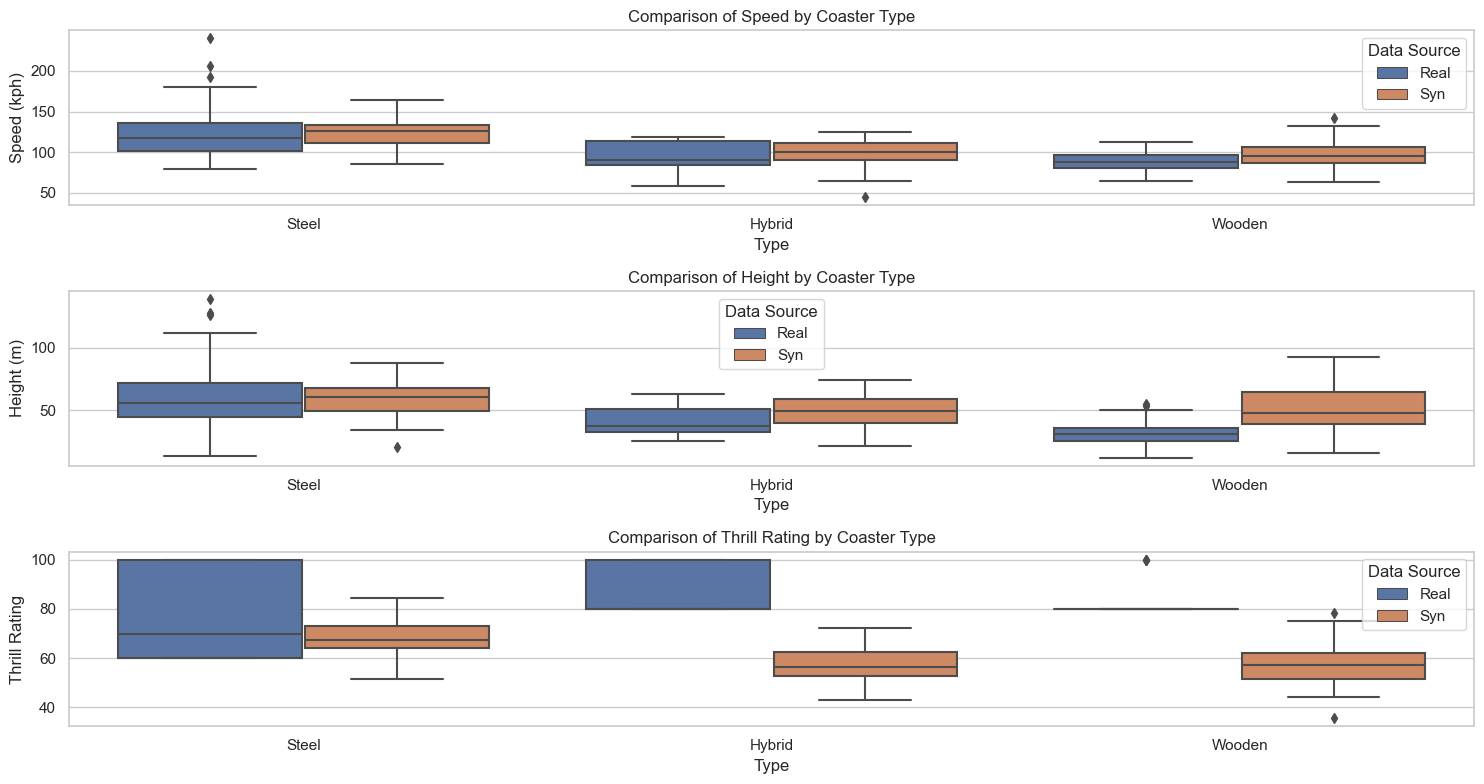

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


realcoasterdata = pd.read_csv('realcoasterdata.csv')
synthesizedcoasterdata = pd.read_csv('coasterss.csv')


realcoasterdata['Data Source'] = 'Real'
synthesizedcoasterdata['Data Source'] = 'Syn'
combined_data = pd.concat([realcoasterdata, synthesizedcoasterdata])
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x='Type', y='Speed (kph)', hue='Data Source', data=combined_data)
plt.title('Comparison of Speed by Coaster Type')

plt.subplot(3, 1, 2)
sns.boxplot(x='Type', y='Height (m)', hue='Data Source', data=combined_data)
plt.title('Comparison of Height by Coaster Type')

plt.subplot(3, 1, 3)
sns.boxplot(x='Type', y='Thrill Rating', hue='Data Source', data=combined_data)
plt.title('Comparison of Thrill Rating by Coaster Type')

plt.tight_layout()
plt.show()

### Box Plot(Real vs Syntheised) Commentary

**(Steel-Speed)** When looking at the real vs syn data, a few things become apparent. Steel by speed is aligned, mostly. The real data has greater variance due to slow steel roller coasters existing. I found it hard to code my speed conditions to be more complex than simply stating it be higher than the other types. Including a condition that would match the real speed identically was beyond me. Regardless, speed is closely aligned with real vs syn data. This was achieved at the synthesised stage by opting for 100kph average speed across the board with a bump of 20 kph for steel 
```
'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10
```

100 was set as the speed mean as I knew the average of the real data, plus 20 for steel as I knew the real steel speed average was 120kph give or take. This ensured the data aligned, for the most part. 

**(Hybrid-Speed)** Same exact story as steel. closely aligned, with the real data having more variance. As i explained before, this is due to the real data for hybrids including extremely modern, tall and fast 'steel' coasters like Zadra with other hybrids that are as old and slow as they get. Hybrid category could be a project onto itself, given its many variables. Still, speed is mostly aligned. 

**(Wooden-Speed)** Similiar story. Synthesised data has speed a little faster, with both sharing similiar variance. 


**(Steel-Height)** Very closely aligned. Synthesised data slightly taller, but very aligned. 

**(Hybrid-Height)** Same as steel. Synthesised data a little taller, similiar spread. 

**(Wooden-Height)** Well off. Wooden synthesised data is a lot taller, with a greater spread. Proably needed to create a condition that slowed the wooden coasters mean by 10kph

**(Steel-Thrill Rating)** Well off, but understandable. The real data's thrill rating is subjective and it uses absolutes like 100/100 if it perceives the coaster in question to be very thrilling. My data simply executed it by height and steel. I was neve going to be able to match these two short of changing the 'real' data to my own opinions. 

**(Hybrid-Thrill Rating**) Well off, identical reason to Steel. 

**(Wooden-Thrill Rating**) Well off, but I ought to have been more generous to the thrill prediction for woodies. Didn't know how to code it, though. 



Very difficult (for me) to code the above. Needed:
    
[Pandas concat Examples](https://www.digitalocean.com/community/tutorials/pandas-concat-examples)

[Pandas Concatenation with examples](https://www.programiz.com/python-programming/pandas/concat)

[Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html)

[Pandas DataFrame: How to concatenate with Python examples](https://www.capitalone.com/tech/open-source/pandas-dataframe-concat/)


### Mean of Real v Synthesised datasets by type

In [80]:
import pandas as pd

real_data = pd.read_csv('realcoasterdata.csv')

#  by type
mean_height_speed_real = real_data.groupby('Type').agg({'Height (m)': 'mean', 'Speed (kph)': 'mean'}).reset_index()
mean_height_speed_real['Dataset'] = 'Real Data'


synthesized_data = pd.read_csv('coasterss.csv')

mean_height_speed_synthesized = synthesized_data.groupby('Type').agg({'Height (m)': 'mean', 'Speed (kph)': 'mean'}).reset_index()
mean_height_speed_synthesized['Dataset'] = 'Synthesized Data'
mean_by_type = pd.concat([mean_height_speed_real, mean_height_speed_synthesized])
print(mean_by_type)

     Type  Height (m)  Speed (kph)           Dataset
0  Hybrid   42.375000    95.625000         Real Data
1   Steel   61.034483   122.137931         Real Data
2  Wooden   32.619048    88.047619         Real Data
0  Hybrid   48.834453    98.604549  Synthesized Data
1   Steel   58.249912   123.445289  Synthesized Data
2  Wooden   49.982825    97.146367  Synthesized Data


### Barplot for Real v Synthesised Datasets

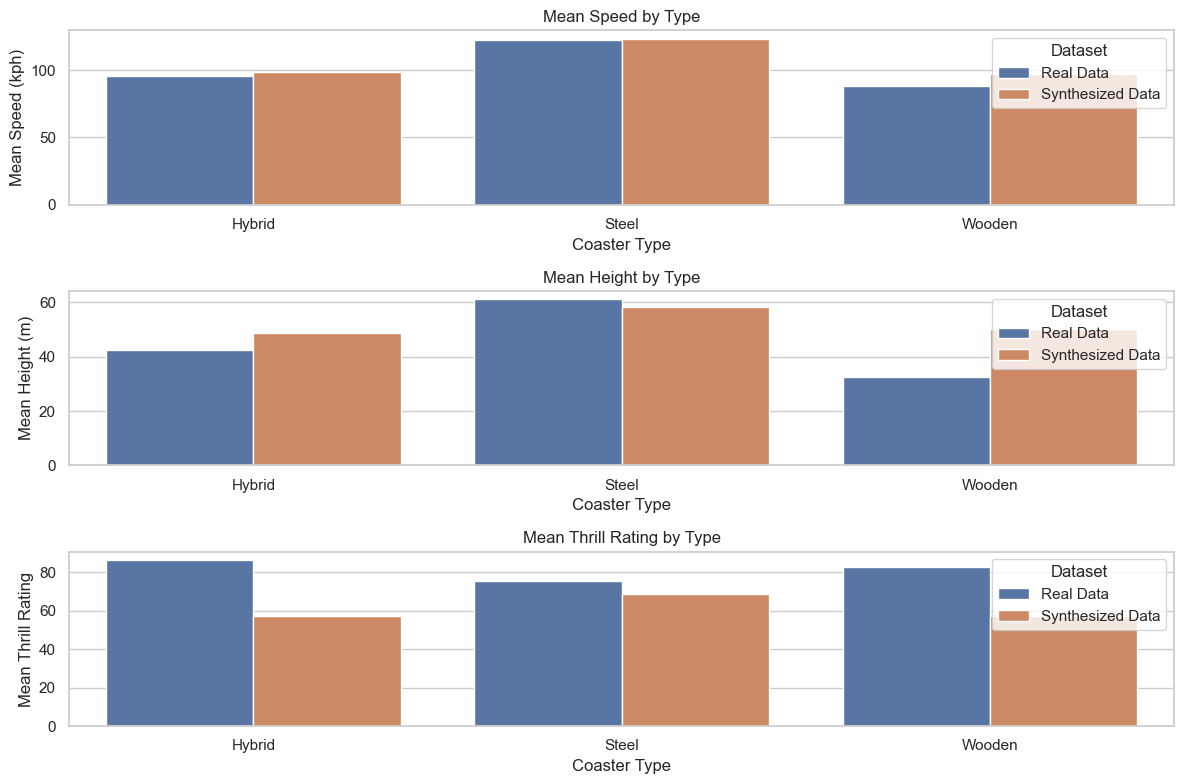

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


real_data = pd.read_csv('realcoasterdata.csv')

# Calculate the mean by type for real data
mean_speed_height_thrill_real = real_data.groupby('Type').agg({'Speed (kph)': 'mean', 'Height (m)': 'mean', 'Thrill Rating': 'mean'}).reset_index()
mean_speed_height_thrill_real['Dataset'] = 'Real Data'

synthesized_data = pd.read_csv('coasterss.csv')


mean_speed_height_thrill_synthesized = synthesized_data.groupby('Type').agg({'Speed (kph)': 'mean', 'Height (m)': 'mean', 'Thrill Rating': 'mean'}).reset_index()
mean_speed_height_thrill_synthesized['Dataset'] = 'Synthesized Data'
mean_by_type = pd.concat([mean_speed_height_thrill_real, mean_speed_height_thrill_synthesized])

plt.figure(figsize=(12, 8))

# Speed
plt.subplot(3, 1, 1)
sns.barplot(x='Type', y='Speed (kph)', hue='Dataset', data=mean_by_type)
plt.title('Mean Speed by Type')
plt.xlabel('Coaster Type')
plt.ylabel('Mean Speed (kph)')

# Bar plotmean Height
plt.subplot(3, 1, 2)
sns.barplot(x='Type', y='Height (m)', hue='Dataset', data=mean_by_type)
plt.title('Mean Height by Type')
plt.xlabel('Coaster Type')
plt.ylabel('Mean Height (m)')

# Mean Thrill Rating 
plt.subplot(3, 1, 3)
sns.barplot(x='Type', y='Thrill Rating', hue='Dataset', data=mean_by_type)
plt.title('Mean Thrill Rating by Type')
plt.xlabel('Coaster Type')
plt.ylabel('Mean Thrill Rating')

plt.tight_layout()
plt.show()

Observations on real vs synthesised coaster data comparisons:

### Commentary on Barplots
Same visualisation results as boxplots, added to create a larger, more easily viewed visualisation than cramped boxplot. 

## Final Interpretation of Results and Discussion